In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow.keras as keras

In [2]:
df_in = pd.read_csv('X_values_FBL_SC_aperture_updated.txt')
df_in.columns = ['Q_init','rms_time','rms_laser','Phase_gun','Amplitude_gun','Solenoid_T','Phase_b1','Amplitude_b1','Phase_b2','Amplitude_b2','Phase_b3','Amplitude_b3']
df_in.tail(5)

,Q_init,rms_time,rms_laser,Phase_gun,Amplitude_gun,Solenoid_T,Phase_b1,Amplitude_b1,Phase_b2,Amplitude_b2,Phase_b3,Amplitude_b3
153994,0.002273,0.003799,0.5,-7.342794,20.0,0.050166,79.402464,2.154804,73.132979,6.564727,-25.964305,8.478428
153995,0.001119,0.008010,0.5,-9.611701,20.0,0.059934,103.096533,6.884488,-29.237887,4.313310,-13.774343,3.827870
153996,0.002196,0.006606,0.5,-4.035026,20.0,0.070726,-36.090227,8.171303,119.647934,9.551180,-144.992903,6.662927
153997,0.001570,0.006417,0.5,4.726403,20.0,0.053106,139.381285,9.769977,61.960262,6.175585,112.500376,2.036236
153998,0.003208,0.002119,0.5,-8.265603,20.0,0.060178,97.602394,8.427523,128.854482,1.037971,150.529381,9.366261


In [3]:
df_out = pd.read_csv('Y_values_FBL_SC_aperture_updated.txt',delimiter=',')
df_out.columns = ['Emittance_z','Bunch_length', 'Kinetic_energy', 'Energy_deviation','TOF','Trans_size','Trans_emittance','Q']
df_out.head(5)

,Emittance_z,Bunch_length,Kinetic_energy,Energy_deviation,TOF,Trans_size,Trans_emittance,Q
0,0.87613,1.1371,1.91360,1.0206,26.287,0.59848,0.047856,-0.000018
1,5.06590,3.8154,1.05560,23.3930,26.614,1.43940,0.117850,-0.000206
2,29.15500,7.7852,0.46246,6.7226,27.715,2.96380,1.098600,-0.000202
3,0.40141,1.4408,1.72180,12.8330,26.511,0.12436,0.045192,-0.000027
4,7.14910,2.3950,2.27080,18.6090,26.214,0.27980,0.045778,-0.000044


In [13]:
#FILTERING

#df_in = df_in[df_out['Kinetic_energy'] < 6.8]
#df_out = df_out[df_out['Kinetic_energy'] < 6.8]

#df_in = df_in[df_out['Energy_deviation'] < 100.0]
#df_out = df_out[df_out['Energy_deviation'] < 100.0]

df_in = df_in[df_out['Bunch_length'] < 100.0]
df_out = df_out[df_out['Bunch_length'] < 100.0]

#df_in = df_in[df_out['Emittance_z'] < 6.0]
#df_out = df_out[df_out['Emittance_z'] < 6.0]


#print(df_in.iloc[21944])
#print(df_out.iloc[21944])

In [4]:
#BUNCH LENGTH TO BUNCH DURATION TRANSFORMATION

length = np.asarray(df_out['Bunch_length'].tolist()) #in mm
k_energy = np.asarray(df_out['Kinetic_energy'].tolist()) #in MeV 
gamma = (k_energy/0.511+1)
beta = np.sqrt(gamma**2-1)/gamma
bunch_duration = length*1e-3/beta/3e8
df_out['Bunch_duration'] = bunch_duration


<ipython-input-4-95f2ea68dbd4>:6: RuntimeWarning: invalid value encountered in true_divide
  beta = np.sqrt(gamma**2-1)/gamma


In [15]:
#CALCULATE TIME OF FLIGHT JITTER USING FUNCTION
from ToF_Jitter_callable import ToF_Jitter

ToF_class = ToF_Jitter('Results_inverted_0323.txt')
jitter_values = []
energy_jitters = []
for i in range(len(df_out['Bunch_length'])):
    try:
        jitters = ToF_class.Jitter_calculator(df_in['Phase_gun'].iloc[i],df_in['Amplitude_gun'].iloc[i],
                                            df_in['Phase_b1'].iloc[i],df_in['Amplitude_b1'].iloc[i],
                                            df_in['Phase_b2'].iloc[i],df_in['Amplitude_b2'].iloc[i],
                                            df_in['Phase_b3'].iloc[i],df_in['Amplitude_b3'].iloc[i])
    except:
        jitters = [[np.inf],[np.inf]]
        
    jitter_values.append(jitters[0][0])
    energy_jitters.append(jitters[1][0])
    if (i%100)==0:
        print(i)
jitter_values = np.asarray(jitter_values)
energy_jitters = np.asarray(energy_jitters)

#print(jitter_values)

0
100
200


C:\Users\qou\ToF_Jitter_callable.py:226: RuntimeWarning: invalid value encountered in sqrt
  t4 = L4/(c_light*np.sqrt(1.0-1.0/(gamma_3**2))) #time of flight needed to cross L3
C:\Users\qou\ToF_Jitter_callable.py:228: RuntimeWarning: invalid value encountered in power
  L4_factor = L4/(me_SI*c_light**3*(gamma_3**2-1)**(3.0/2.0))
C:\Users\qou\ToF_Jitter_callable.py:193: RuntimeWarning: invalid value encountered in sqrt
  t3 = L3/(c_light*np.sqrt(1.0-1.0/(gamma_2**2))) #time of flight needed to cross L3
C:\Users\qou\ToF_Jitter_callable.py:195: RuntimeWarning: invalid value encountered in power
  L3_factor = L3/(me_SI*c_light**3*(gamma_2**2-1)**(3.0/2.0))


300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18500
18600


In [16]:
#FINALLY, CREATE THE TIME RESOLUTION COLUMN AND SAVE 
df_out['ToF_Jitter'] = jitter_values
df_out['E_Jitter'] = energy_jitters
df_out['Time_Resolution'] = np.sqrt(bunch_duration**2+jitter_values**2)

with open('Test.txt','w') as file_test:
    df_out.to_csv(file_test)
print(df_out['Time_Resolution'].min())
print(df_in.loc[53585])
print(df_out.loc[53585])

#print(df_out['Bunch_duration'].iloc[37676])
#print(df_out['ToF_Jitter'].iloc[37676])

1.0986799415402067e-13
Q_init            0.002926
rms_time          0.003162
rms_laser         0.500000
Phase_gun        -8.383198
Amplitude_gun    20.000000
Solenoid_T        0.074396
Phase_b1        -62.034665
Amplitude_b1      4.242051
Phase_b2        -33.181975
Amplitude_b2      7.413847
Phase_b3        -64.989650
Amplitude_b3      8.629181
Name: 53585, dtype: float64
Emittance_z         5.386000e-01
Bunch_length        2.939700e-02
Kinetic_energy      2.966300e+00
Energy_deviation    1.932200e+01
TOF                 2.612900e+01
Trans_size          3.167300e+00
Trans_emittance     2.184800e-01
Q                  -2.458572e-03
Bunch_duration      9.906551e-14
ToF_Jitter          6.871691e-14
E_Jitter            7.582375e-02
Time_Resolution     1.205653e-13
Name: 53585, dtype: float64


In [17]:
###Minimum locations: 18835[125fs], 21944[119fs], 37676[100fs]

df_out.sort_values(by=['Time_Resolution'])
#df_out.sort_values(by=['ToF_Jitter'])
#df_out.sort_values(by=['Bunch_duration'])


#df_out['Time_Resolution'].argmin()

,Emittance_z,Bunch_length,Kinetic_energy,Energy_deviation,TOF,Trans_size,Trans_emittance,Q,Bunch_duration,ToF_Jitter,E_Jitter,Time_Resolution
70576,0.33580,0.020877,2.64410,16.090,26.154,0.60950,0.053870,-0.000006,7.052107e-14,8.424818e-14,0.030107,1.098680e-13
37714,0.45467,0.024223,2.61230,18.777,26.154,0.89071,0.073391,-0.000011,8.184619e-14,8.111089e-14,0.071702,1.152292e-13
53585,0.53860,0.029397,2.96630,19.322,26.129,3.16730,0.218480,-0.002459,9.906551e-14,6.871691e-14,0.075824,1.205653e-13
130164,0.54274,0.029931,2.75670,19.720,26.128,0.76534,0.070749,-0.000011,1.010127e-13,7.183711e-14,0.079083,1.239522e-13
112260,0.59455,0.029703,2.77690,21.353,26.141,0.33014,0.033492,-0.000029,1.002279e-13,7.474140e-14,0.084156,1.250276e-13
...,...,...,...,...,...,...,...,...,...,...,...,...
132861,42.09600,62.460000,0.30225,25.278,29.742,2.89110,0.295400,-0.000012,2.676311e-10,NaN,NaN,NaN
132866,154.67000,43.154000,0.43790,39.288,28.137,6.96990,1.209600,-0.000062,1.707148e-10,NaN,0.200940,NaN
132936,41.27100,46.322000,0.22404,12.610,29.855,1.86110,0.188360,-0.000036,2.148069e-10,NaN,0.706108,NaN
132962,229.65000,73.586000,0.44705,56.438,29.509,2.53040,0.320190,-0.000014,2.899785e-10,NaN,NaN,NaN


In [44]:
df_out['Log_emittance'] = np.log(df_out['Emittance_z'])
df_out['Log_bunch_length'] = np.log10(df_out['Bunch_length'])
df_out['Log_energy'] = np.log10(df_out['Kinetic_energy'])
df_out['Log_deviation'] = np.log10(df_out['Energy_deviation'])
df_out['Log_TOF'] = np.log10(df_out['TOF'])
df_out['Log_trans_emittance'] = np.log10(df_out['Trans_emittance'])
df_out['Log_trans_size'] = np.log10(df_out['Trans_size'])
df_out['Log_Q'] = np.log10(-df_out['Q'])



#df_out.iloc[np.arange(df_out['Bunch_length'].argmax()-5,df_out['Bunch_length'].argmax()+5)]

In [45]:
df_out['Log_TR'] = np.log10(df_out['Time_Resolution'])

#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(df_in, df_out, test_size=0.1)
##df_out_short = df_out.drop(axis=1,columns='Bunch_length')

df_in_short = df_in[['Q_init','rms_time','Phase_gun','Amplitude_gun','Phase_b1','Amplitude_b1','Phase_b2','Amplitude_b2','Phase_b3','Amplitude_b3']]
df_in_short = df_in_short[df_out['Time_Resolution'].notna()]

df_out_short = df_out[['Log_TR']]
df_out_short = df_out_short[df_out['Time_Resolution'].notna()]
#df_out_short = df_out[['Log_bunch_length','Log_deviation']]
#df_out_short = df_out[['Log_bunch_length']]
#df_out_short = df_out[['Log_emittance', 'Log_bunch_length','Log_deviation']]




x_train, x_validate, x_test = np.split(df_in_short.sample(frac=1, random_state=42), [int(.7*len(df_in)), int(.9*len(df_in))])
#y_train, y_validate, y_test = np.split(df_out['Log_bunch_length'].sample(frac=1, random_state=42), [int(.7*len(df_out)), int(.9*len(df_out))])
y_train, y_validate, y_test = np.split(df_out_short.sample(frac=1, random_state=42), [int(.7*len(df_out)), int(.9*len(df_out))])




len(y_test)#.head(5)

4349

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_validate = scaler.transform(x_validate)
x_test = scaler.transform(x_test)

scaler2 = MinMaxScaler()
scaler2.fit(y_train)
y_train = scaler2.transform(y_train)
y_validate = scaler2.transform(y_validate)
y_test = scaler2.transform(y_test)

In [48]:
import tensorflow_addons as tfa
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorboard.plugins.hparams import api as hp

#Enable hiper


#Define the simple model we will use for learning (still quite random)
def model_simple(n_inputs,n_outputs):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(2002, input_dim = n_inputs, activation = 'relu'))
#    model.add(keras.layers.Dropout(.2))
    model.add(keras.layers.Dense(447, activation = 'relu'))
#    model.add(keras.layers.Dropout(.2))
    model.add(keras.layers.Dense(100, activation = 'relu'))
#    model.add(keras.layers.Dropout(.2))
    model.add(keras.layers.Dense(22, activation = 'relu'))
#    model.add(keras.layers.Dropout(.2))
    model.add(keras.layers.Dense(n_outputs))#, activation = 'linear'))
    model.compile(loss='mse', optimizer='adam', metrics=[tfa.metrics.r_square.RSquare(y_shape = (n_outputs,))])
    return model


#TensorBoard creation
log_directory = 'logs/fit'
timestamp = datetime.now().strftime("%Y-%m-%d--%H%M")
log_directory = log_directory + '/' + timestamp

board = TensorBoard(log_dir = log_directory, histogram_freq=1,
                   write_graph = True,
                   write_images = True,
                   update_freq = 'epoch',
                   profile_batch = 2,
                   embeddings_freq = 1)

#Early stop creation to stop before overfitting
early_stop = EarlyStopping(monitor='val_loss',mode ='min',verbose=1, patience=25)

In [49]:

hist = {}
#Train the simple model and evaluate
model = model_simple(10,1)

hist['simple'] = model.fit(x_train, y_train, validation_data=(x_validate, y_validate),
                           epochs=1000,callbacks=[early_stop, board])

loss_train, train_rsquare = model.evaluate(x_train, y_train, verbose=0)
loss_validation, validation_rsquare = model.evaluate(x_validate, y_validate, verbose=0)
loss_test, test_rsquare = model.evaluate(x_test, y_test, verbose=0)

print('Train: %.4f, Test: %.4f' % (train_rsquare, test_rsquare))
model.save('model.h5')

Epoch 1/1000
1178/1181 [============================>.] - ETA: 0s - loss: 0.0036 - r_square: 0.5276

C:\Users\qou\Anaconda3\lib\site-packages\tensorflow\python\keras\metrics.py:254: UserWarning: Metric RSquare implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  warnings.warn('Metric %s implements a `reset_states()` method; rename it '


1181/1181 [==============================] - 24s 19ms/step - loss: 0.0036 - r_square: 0.5278 - val_loss: 0.0023 - val_r_square: 0.6842
Epoch 2/1000
1181/1181 [==============================] - 19s 16ms/step - loss: 0.0022 - r_square: 0.7130 - val_loss: 0.0017 - val_r_square: 0.7733
Epoch 3/1000
1181/1181 [==============================] - 19s 16ms/step - loss: 0.0018 - r_square: 0.7682 - val_loss: 0.0016 - val_r_square: 0.7893
Epoch 4/1000
1181/1181 [==============================] - 18s 16ms/step - loss: 0.0015 - r_square: 0.8001 - val_loss: 0.0017 - val_r_square: 0.7762
Epoch 5/1000
1181/1181 [==============================] - 21s 18ms/step - loss: 0.0014 - r_square: 0.8229 - val_loss: 0.0011 - val_r_square: 0.8530
Epoch 6/1000
1181/1181 [==============================] - 18s 15ms/step - loss: 0.0012 - r_square: 0.8388 - val_loss: 0.0010 - val_r_square: 0.8591
Epoch 7/1000
1181/1181 [==============================] - 18s 15ms/step - loss: 0.0011 - r_square: 0.8531 - val_loss: 0.0015 

1181/1181 [==============================] - 16s 14ms/step - loss: 1.8679e-04 - r_square: 0.9757 - val_loss: 4.9346e-04 - val_r_square: 0.9333
Epoch 105/1000
1181/1181 [==============================] - 16s 13ms/step - loss: 1.9246e-04 - r_square: 0.9749 - val_loss: 4.1178e-04 - val_r_square: 0.9443
Epoch 106/1000
1181/1181 [==============================] - 16s 13ms/step - loss: 2.1195e-04 - r_square: 0.9724 - val_loss: 4.5772e-04 - val_r_square: 0.9381
Epoch 107/1000
1181/1181 [==============================] - 16s 13ms/step - loss: 1.8024e-04 - r_square: 0.9765 - val_loss: 4.0072e-04 - val_r_square: 0.9458
Epoch 108/1000
1181/1181 [==============================] - 16s 13ms/step - loss: 2.0200e-04 - r_square: 0.9737 - val_loss: 4.0753e-04 - val_r_square: 0.9449
Epoch 109/1000
1181/1181 [==============================] - 16s 13ms/step - loss: 1.8063e-04 - r_square: 0.9765 - val_loss: 3.8384e-04 - val_r_square: 0.9481
Epoch 110/1000
1181/1181 [==============================] - 16s 13m

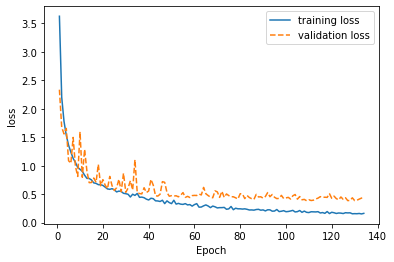

In [50]:
def create_plot(ax, hist_output, scale=1, prefix=None, same_colour=False):
    loss = hist_output.history['loss']
    val_loss = hist_output.history['val_loss']
    loss = np.asarray(loss)
#    loss = loss/loss.max()
    val_loss = np.asarray(val_loss)
#    val_loss = val_loss/val_loss.max()

    epoch = np.arange(1, len(loss) +1)
    
    label = 'training loss'
    if prefix is not None: label = '{}: {}'.format(prefix, label)
    line, = ax.plot(epoch, loss * scale, '-', label=label)
    
    label = 'validation loss'
    if prefix is not None: label = '{}: {}'.format(prefix, label)
        
    kws = {}
    if same_colour:
        colour = line.get_color()
        kws.setdefault('color', colour)
    ax.plot(epoch, val_loss * scale, '--', label=label, **kws)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('loss')
    ax.legend(loc=0)

fig, ax = plt.subplots(1, 1)
create_plot(ax, hist['simple'], scale=1000)

In [26]:
from scipy.stats import gaussian_kde

#Quite decent result with 2002, 447, 100, 22 -> 4

y_test_evaluation_emittance = np.asarray(y_test['Log_emittance'][:20000].values.tolist())
calculated_evaluation_emittance = model.predict(x_test)[:20000,0]
xy0 = np.vstack([y_test_evaluation_emittance, calculated_evaluation_emittance])
z0 = gaussian_kde(xy0)(xy0)

y_test_evaluation_bunch_length = np.asarray(y_test['Log_bunch_length'][:20000].values.tolist())
calculated_evaluation_bunch_length = model.predict(x_test)[:20000,1]
xy3 = np.vstack([y_test_evaluation_bunch_length, calculated_evaluation_bunch_length])
z3 = gaussian_kde(xy3)(xy3)

y_test_evaluation_energy = np.asarray(y_test['Log_energy'][:20000].values.tolist())
calculated_evaluation_energy = model.predict(x_test)[:20000,2]
xy1 = np.vstack([y_test_evaluation_energy, calculated_evaluation_energy])
z1 = gaussian_kde(xy1)(xy1)

y_test_evaluation_deviation = np.asarray(y_test['Log_deviation'][:20000].values.tolist())
calculated_evaluation_deviation = model.predict(x_test)[:20000,3]
xy2 = np.vstack([y_test_evaluation_deviation, calculated_evaluation_deviation])
z2 = gaussian_kde(xy2)(xy2)

#plt.scatter(y_test['Log_bunch_length'],model.predict(x_test)[:,3:])
fig,axs = plt.subplots(2,2,figsize=(12,8))

axs[0,0].set_title('Log emittance')
axs[0,0].scatter(y_test_evaluation_emittance,calculated_evaluation_emittance,c=z0,s=1)
axs[0,0].plot(y_test['Log_emittance'],y_test['Log_emittance'],'r')

axs[0,1].set_title('Log bunch length')
axs[0,1].scatter(y_test_evaluation_bunch_length,calculated_evaluation_bunch_length,c=z3,s=1)
axs[0,1].plot(y_test['Log_bunch_length'],y_test['Log_bunch_length'],'r')

axs[1,0].set_title('Log energy')
axs[1,0].scatter(y_test_evaluation_energy,calculated_evaluation_energy,c=z1,s=1)
axs[1,0].plot(y_test['Log_energy'],y_test['Log_energy'],'r')

axs[1,1].set_title('Log energy deviation')
axs[1,1].scatter(y_test_evaluation_deviation,calculated_evaluation_deviation,c=z2,s=1)
axs[1,1].plot(y_test['Log_deviation'],y_test['Log_deviation'],'r')

fig.savefig('4out_model.png')
plt.show()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
from scipy.stats import gaussian_kde

#Extremely good result with 2002, 447, 100, 22 -> 4

y_test_evaluation_emittance = np.asarray(y_test['Log_emittance'][:20000].values.tolist())
calculated_evaluation_emittance = model.predict(x_test)[:20000,0]
xy0 = np.vstack([y_test_evaluation_emittance, calculated_evaluation_emittance])
z0 = gaussian_kde(xy0)(xy0)

y_test_evaluation_bunch_length = np.asarray(y_test['Log_bunch_length'][:20000].values.tolist())
calculated_evaluation_bunch_length = model.predict(x_test)[:20000,1]
xy3 = np.vstack([y_test_evaluation_bunch_length, calculated_evaluation_bunch_length])
z3 = gaussian_kde(xy3)(xy3)

y_test_evaluation_deviation = np.asarray(y_test['Log_deviation'][:20000].values.tolist())
calculated_evaluation_deviation = model.predict(x_test)[:20000,2]
xy2 = np.vstack([y_test_evaluation_deviation, calculated_evaluation_deviation])
z2 = gaussian_kde(xy2)(xy2)

#plt.scatter(y_test['Log_bunch_length'],model.predict(x_test)[:,3:])
fig,axs = plt.subplots(1,3,figsize=(15,4))

axs[0].set_title('Log emittance')
axs[0].scatter(y_test_evaluation_emittance,calculated_evaluation_emittance,c=z0,s=1)
axs[0].plot(y_test['Log_emittance'],y_test['Log_emittance'],'r')

axs[1].set_title('Log bunch length')
axs[1].scatter(y_test_evaluation_bunch_length,calculated_evaluation_bunch_length,c=z3,s=1)
axs[1].plot(y_test['Log_bunch_length'],y_test['Log_bunch_length'],'r')

axs[2].set_title('Log energy deviation')
axs[2].scatter(y_test_evaluation_deviation,calculated_evaluation_deviation,c=z2,s=1)
axs[2].plot(y_test['Log_deviation'],y_test['Log_deviation'],'r')

fig.savefig('3out_model.png')
plt.show()

In [ ]:
#Amazing result with 2002, 447, 100, 22 -> 2
y_test_evaluation_bunch_length = np.asarray(y_test['Log_bunch_length'][:20000].values.tolist())
calculated_evaluation_bunch_length = model.predict(x_test)[:20000,0]
xy3 = np.vstack([y_test_evaluation_bunch_length, calculated_evaluation_bunch_length])
z3 = gaussian_kde(xy3)(xy3)

y_test_evaluation_deviation = np.asarray(y_test['Log_deviation'][:20000].values.tolist())
calculated_evaluation_deviation = model.predict(x_test)[:20000,1]
xy2 = np.vstack([y_test_evaluation_deviation, calculated_evaluation_deviation])
z2 = gaussian_kde(xy2)(xy2)

#plt.scatter(y_test['Log_bunch_length'],model.predict(x_test)[:,3:])
fig,axs = plt.subplots(1,2,figsize=(12,4))

axs[0].set_title('Log deviation')
axs[0].scatter(y_test_evaluation_deviation,calculated_evaluation_deviation,c=z2,s=1)
axs[0].plot(y_test['Log_deviation'],y_test['Log_deviation'],'r')

axs[1].set_title('Log bunch length')
axs[1].scatter(y_test_evaluation_bunch_length,calculated_evaluation_bunch_length,c=z3,s=1)
axs[1].plot(y_test['Log_bunch_length'],y_test['Log_bunch_length'],'r')

fig.savefig('2out_model.png')
plt.show()

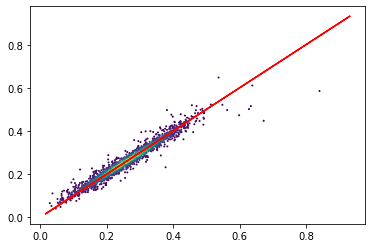

In [70]:
from scipy.stats import gaussian_kde
#For 1 output model
#Result with 550, 450, 210 -> 1
y_test_evaluation = np.asarray(y_test[:2000])[:,0]
calculated_evaluation = model.predict(x_test)[:2000,0]

xy = np.vstack([y_test_evaluation, calculated_evaluation])
z = gaussian_kde(xy)(xy)

fig = plt.figure()
plt.scatter(y_test_evaluation, calculated_evaluation, c=z, s=1)
plt.plot(y_test,y_test,'r')
fig.savefig('1out_model.png')


In [ ]:
#For 1 output model
#Best result with 2002, 447, 100, 22 -> 1
y_test_evaluation = np.asarray(y_test[:20000].values.tolist())[:,0]
calculated_evaluation = model.predict(x_test)[:20000,0]

xy = np.vstack([y_test_evaluation, calculated_evaluation])
z = gaussian_kde(xy)(xy)

plt.scatter(y_test_evaluation, calculated_evaluation, c=z, s=1)
plt.plot(y_test,y_test,'r')


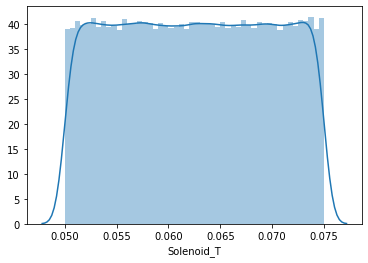

In [12]:
#sns.distplot(df_out['Time_Resolution'])
sns.distplot(df_in['Solenoid_T'])